In [3]:
#libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [4]:
#let us read in the data
ipo = pd.read_csv('Indian_IPO_Market_Data.csv')

 The dataset has 9 columns and 319 rows. Each row is an IPO

In [10]:
ipo['IPOName'].nunique()

319

In [11]:
ipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.6+ KB


In [12]:
ipo['Listing_Gains_Percent'].describe()

count    319.000000
mean       4.742696
std       47.650946
min      -97.150000
25%      -11.555000
50%        1.810000
75%       25.310000
max      270.400000
Name: Listing_Gains_Percent, dtype: float64

In [14]:
ipo['Listing_Gains_Profit'] =np.where(ipo['Listing_Gains_Percent'] > 0, 1, 0)

In [16]:
#check missing values.
ipo.isnull().sum()

Date                     0
IPOName                  0
Issue_Size               0
Subscription_QIB         0
Subscription_HNI         0
Subscription_RII         0
Subscription_Total       0
Issue_Price              0
Listing_Gains_Percent    0
Listing_Gains_Profit     0
dtype: int64

In [17]:
ipo.describe(include='all')

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent,Listing_Gains_Profit
count,319,319,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
unique,287,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16/08/21,Infinite Comp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696,0.545455
std,NaN,NaN,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946,0.498712
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000,0.000000
25%,NaN,NaN,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000,0.000000
50%,NaN,NaN,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000,1.000000
75%,NaN,NaN,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000,1.000000


In [19]:
ipo['Listing_Gains_Profit'].value_counts(normalize=True)
#54% of Ipos made a profit

Listing_Gains_Profit
1    0.545455
0    0.454545
Name: proportion, dtype: float64

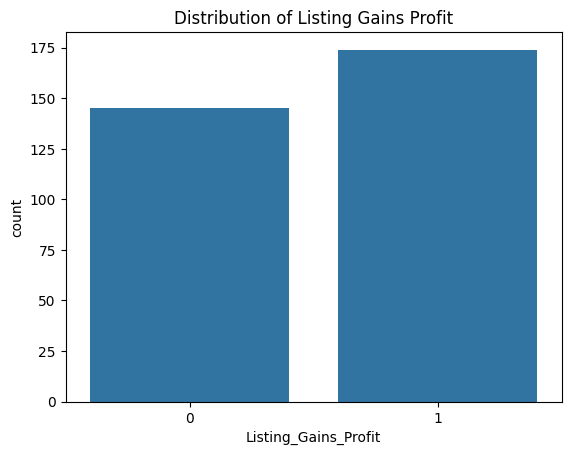

In [22]:
#visualisations
sns.countplot(data=ipo,x='Listing_Gains_Profit').set(title = 'Distribution of Listing Gains Profit')
plt.show()

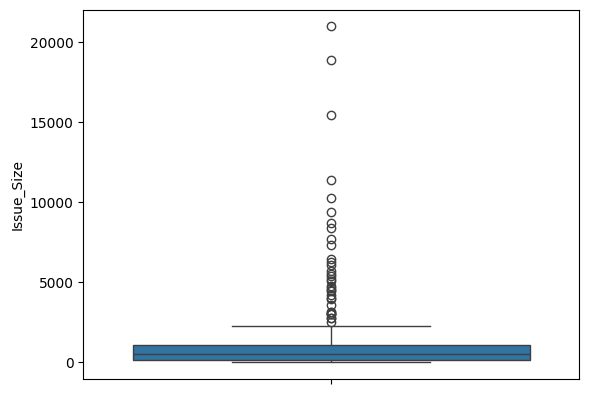

In [24]:
sns.boxplot(y=ipo['Issue_Size'])
plt.show()

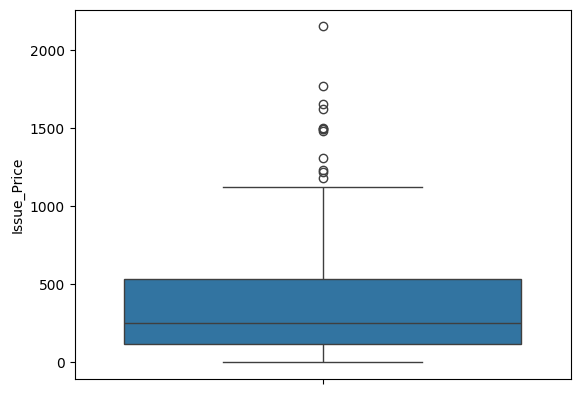

In [25]:
#issue price
sns.boxplot(y=ipo['Issue_Price'])
plt.show()

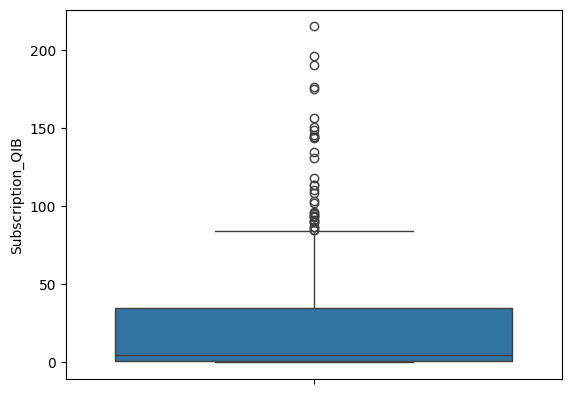

In [27]:
#sub QIB
sns.boxplot(y=ipo['Subscription_QIB'])
plt.show()

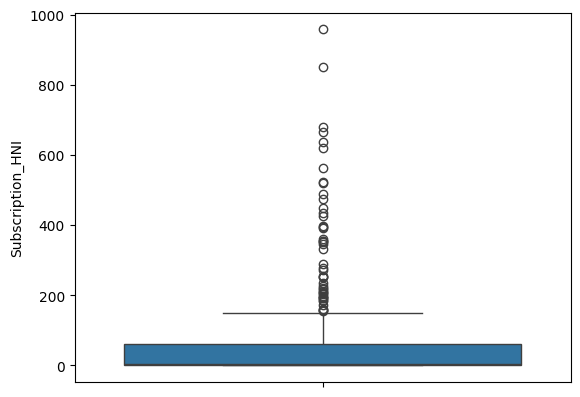

In [28]:
#sub HNI
sns.boxplot(y=ipo['Subscription_HNI'])
plt.show()

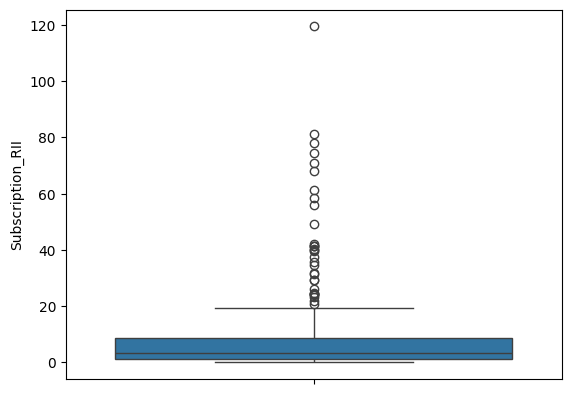

In [29]:
#sub RII
sns.boxplot(y=ipo['Subscription_RII'])
plt.show()

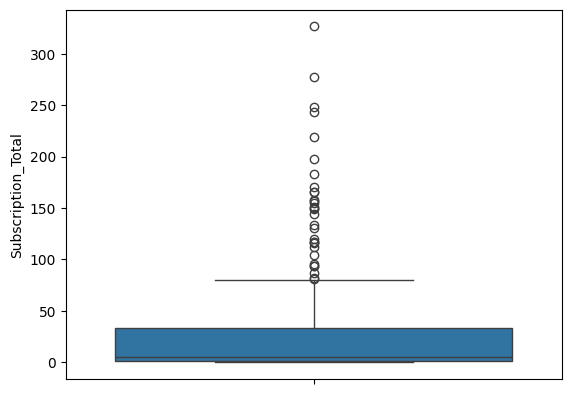

In [30]:
# sub total 
sns.boxplot(y=ipo['Subscription_Total'])
plt.show()

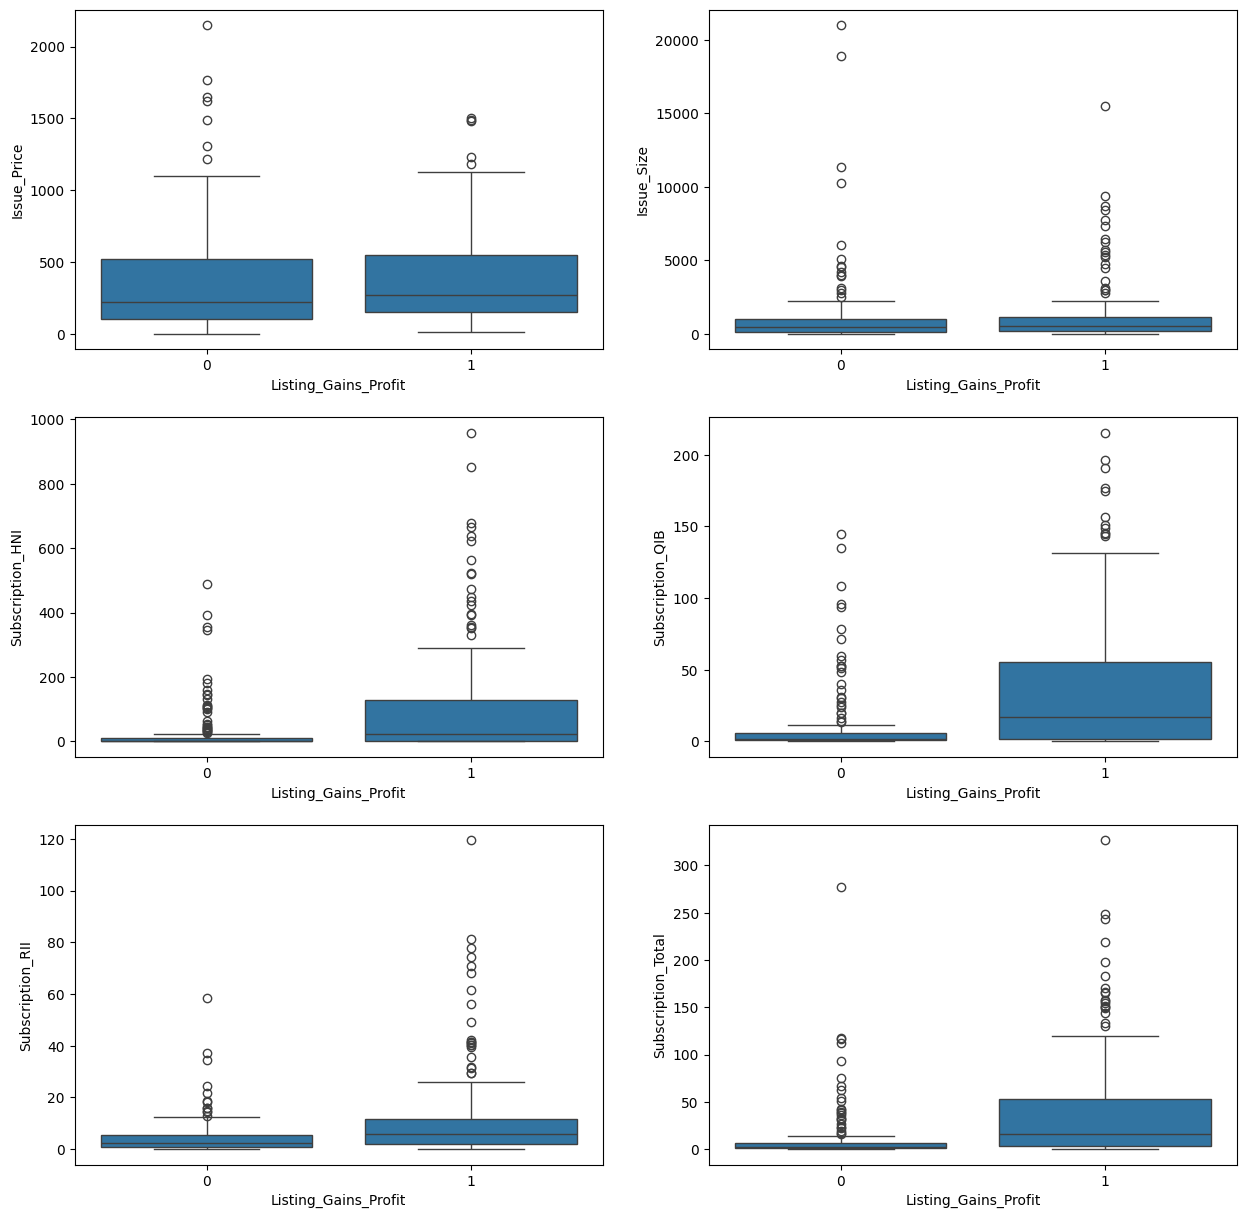

In [41]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
# profit by  issue price
sns.boxplot(x = ipo['Listing_Gains_Profit'],y=ipo['Issue_Price'],ax=axs[0,0])
sns.boxplot(x = ipo['Listing_Gains_Profit'],y=ipo['Issue_Size'],ax = axs[0,1])
sns.boxplot(x= ipo['Listing_Gains_Profit'],y= ipo['Subscription_HNI'],ax = axs[1,0])
sns.boxplot(x=ipo['Listing_Gains_Profit'],y=ipo['Subscription_QIB'],ax=axs[1,1])
sns.boxplot(x=ipo['Listing_Gains_Profit'],y=ipo['Subscription_RII'],ax = axs[2,0])
sns.boxplot(x=ipo['Listing_Gains_Profit'],y=ipo['Subscription_Total'],ax=axs[2,1])

plt.show()

* Issue price and Issue size don't seem to have an obvious effect on Listing gains profit.
* all subscription variables have a clear effect on Listing gains profit particularly HNI and QIB.

In [44]:
#let's look at predictors correlation to reduce multicollinearity
predictor_vars = ['Issue_Size','Subscription_QIB','Subscription_HNI','Subscription_RII','Subscription_Total','Issue_Price']
ipo[predictor_vars].corr()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price
Issue_Size,1.000000,-0.037724,-0.103484,-0.147791,-0.093351,0.364733
Subscription_QIB,-0.037724,1.000000,0.773933,0.437462,0.815785,0.188105
Subscription_HNI,-0.103484,0.773933,1.000000,0.622993,0.954816,0.037283
Subscription_RII,-0.147791,0.437462,0.622993,1.000000,0.718738,-0.072112
Subscription_Total,-0.093351,0.815785,0.954816,0.718738,1.000000,0.051174
Issue_Price,0.364733,0.188105,0.037283,-0.072112,0.051174,1.000000


Based on the correlation figures, I' ll drop the `Subscription_Total` & `Subscription_HNI` vars from the predictors.

In [45]:
predictor_vars_cleaned = ['Issue_Size','Subscription_QIB','Subscription_RII','Issue_Price']